# Exercise 5:  The perceptron

In this notebook you will explore the perceptron algorithm.  For all questions use the breast cancer dataset we looked at in class.


### Part 1

Explore the accuracy of the perceptron on the breast cancer dataset while varying the number of epochs that the perceptron is trained.  Measure accuracy on both the training and test sets and plot the results as a function of number of epochs (best to use a logarithmic axis for the x-axis, using plt.semilogx).  What can you conclude?


*I can conclude that using at least one hundred itertions on the perception is viable for getting some generalization into the algorithm, but then from here the accuracy drops off per the test verus training set, although the accuracy may drop off this doesn't directly mean that the algorithm got worse in the REAL world.  Although doing iterations way about this 100 mark it looks like around 10^3 iterations the algorithm does seem to switch from generalizing to overfitting, something not ideal.  Thus from what I understand the sweet spot exists between 10^1 and 10^3 iterations, although this is a large range, we have not yet learned how to estimate a better hyperparameter yet.*

initialized with a zeros weight vector
accuracy:  0.8421052631578947
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector


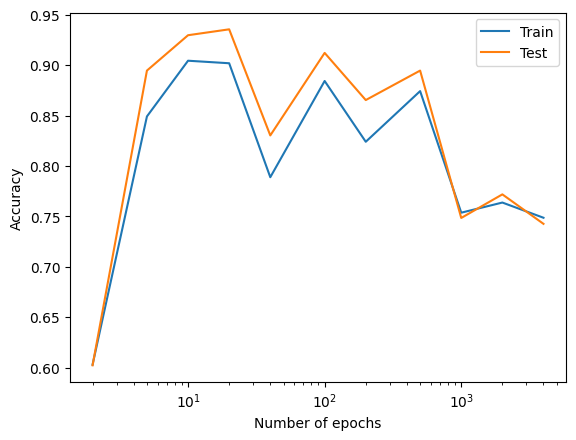

In [14]:
num_epochs = [2, 5, 10, 20, 40, 100, 200, 500, 1000, 2000, 4000]

## from lecture 

class perceptron :
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=False, seed=42) :
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = random_w
        self.seed = seed
  
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        
        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
            print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
        while (not converged and iteration <= self.iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
            iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)
 
    def decision_function(self, x) :
        return np.dot(x, self.w)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.dot(X, self.w)
        return np.sign(scores)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        aold = -self.wold[0]/self.wold[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=20)
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

X,y = data = load_breast_cancer(return_X_y = True)
X.shape, y.shape

y = y * 2 - 1
X = np.hstack([X, np.ones((len(X), 1))])
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5)

p = perceptron(iterations = 500, learning_rate = 0.1)
p.fit(X_train, y_train)

y_pred = p.predict(X_test)
print('accuracy: ', np.mean(y_test == y_pred))

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop over the different numbers of epochs
for epochs in num_epochs:
    # Create a new perceptron with the current number of epochs
    p = perceptron(iterations=epochs, learning_rate=0.1,random_w=True, seed=42)
    
    # Fit the perceptron on the training data
    p.fit(X_train, y_train)
    
    # Predict the labels for the training and test data
    y_train_pred = p.predict(X_train)
    y_test_pred = p.predict(X_test)
    
    # Calculate the accuracy for the training and test data
    train_accuracy = np.mean(y_train == y_train_pred)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = np.mean(y_test == y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracies as a function of the number of epochs
plt.semilogx(num_epochs, train_accuracies, label='Train')
plt.semilogx(num_epochs, test_accuracies, label='Test')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Part 2

Can you tell if the breast cancer dataset is linearly separable?

*You cannot tell because the train and test data seems to approach 100% but its hard to know for sure if it ever reaches that perfect accuracy because even in a high dimensional space it may still not be linearly seperable.  And with the iterations done above it is possible that it is asymptotic to a perfect accuracy meaning it never reaches but approaches it.  This could be because of several datapoints that no matter how the hyperplane is split, a false positive or false negative always exists.*

In [ ]:
# and if you want to have some code

### Part 3 

Do you observe differences in performance by changing the learning rate?
Use a plot of training and test accuracy as a function of learning rate to address this question.  Again, use plt.semilogx for the x-axis to have a logarithmic scale.

Yes a general trend seems to exist across the learning rates from smaller to larger you seem to on average lose accuracy.  Although this effect seems to really happen after moving above 10^-1 as your learning rate.  

initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector
initialized with random weight vector


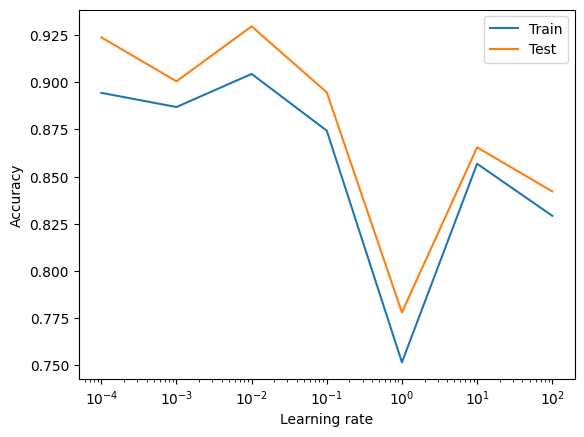

In [13]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop over the different learning rates
for lr in learning_rates:
    # Create a new perceptron with the current learning rate
    p = perceptron(iterations=500, learning_rate=lr, random_w=True, seed=42)
    
    # Fit the perceptron on the training data
    p.fit(X_train, y_train)
    
    # Predict the labels for the training and test data
    y_train_pred = p.predict(X_train)
    y_test_pred = p.predict(X_test)
    
    # Calculate the accuracy for the training and test data
    train_accuracy = np.mean(y_train == y_train_pred)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = np.mean(y_test == y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracies as a function of the learning rate
plt.semilogx(learning_rates, train_accuracies, label='Train')
plt.semilogx(learning_rates, test_accuracies, label='Test')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()